In [1]:
import pandas as pd

# Load dataset from Dataset folder
df = pd.read_csv('../Dataset/cleaned_bank_churn.csv')

# Preview data
print(df.shape)
df.head()


(10127, 21)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.34,1144,42,1.63,0.06,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.54,1291,33,3.71,0.11,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.59,1887,20,2.33,0.00,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.41,1171,20,2.33,0.76,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.18,816,28,2.50,0.00,0


In [3]:
# Check the data set info
df.info()

# Summary statistics for numeric columns
df.describe()

# Missing Values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Churn_Flag                  0
dtype: int64

C:\Users\Siri\AppData\Local\Temp\ipykernel_7960\3204410477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Flag', data=df, palette='Set2')


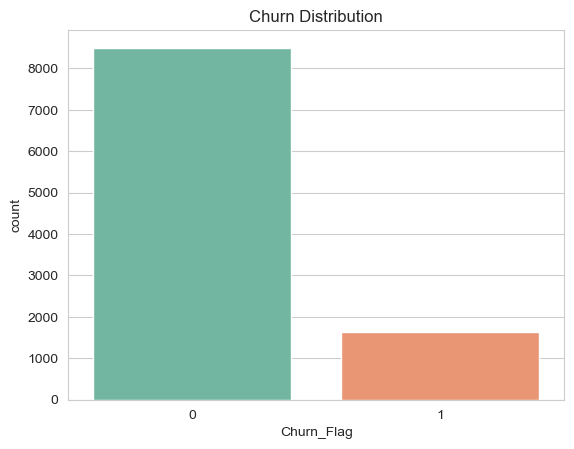

Churn_Flag
0    83.934038
1    16.065962
Name: proportion, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Churn flag distribution
sns.countplot(x='Churn_Flag', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.savefig('../images/churn_distribution.png', bbox_inches='tight')
plt.show()

# Percentage churned vs retained
churn_rate = df['Churn_Flag'].value_counts(normalize=True) * 100
print(churn_rate)


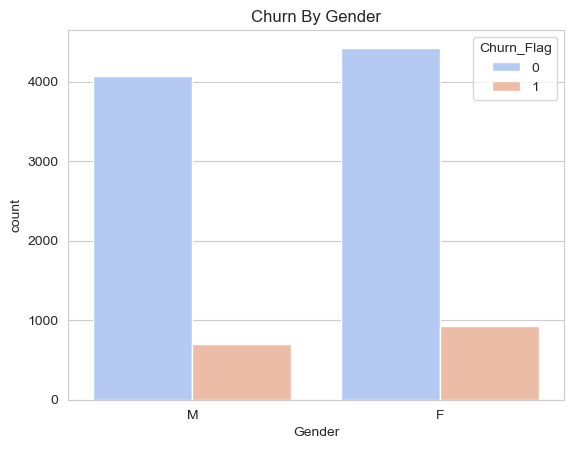

In [17]:
sns.countplot(x='Gender', hue='Churn_Flag', data=df, palette='coolwarm')
plt.title('Churn By Gender')
plt.savefig('../Images/churn_by_gender.png', bbox_inches='tight')
plt.show()

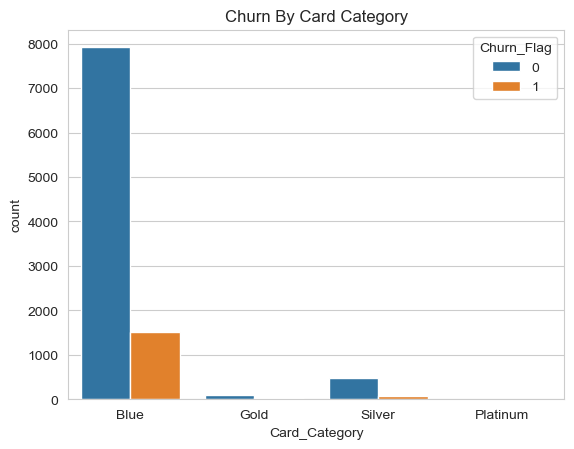

In [18]:
sns.countplot(x='Card_Category', hue='Churn_Flag', data= df)
plt.title('Churn By Card Category')
plt.savefig('../Images/churn_by_card Category.png', bbox_inches='tight')
plt.show()

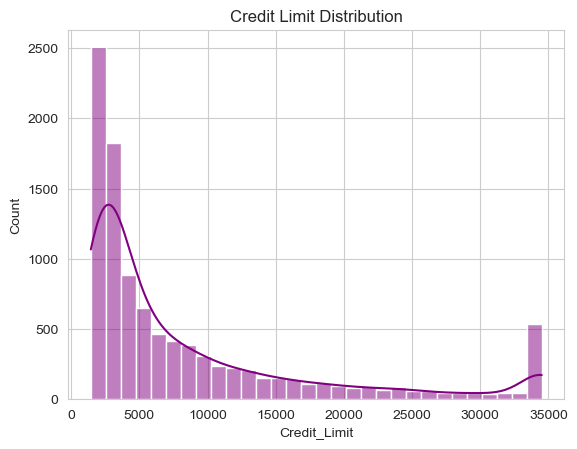

In [19]:
sns.histplot(df['Credit_Limit'], kde=True, bins=30, color='purple')
plt.title('Credit Limit Distribution')
plt.savefig('../Images/credit_limit_distribution.png', bbox_inches='tight')
plt.show()

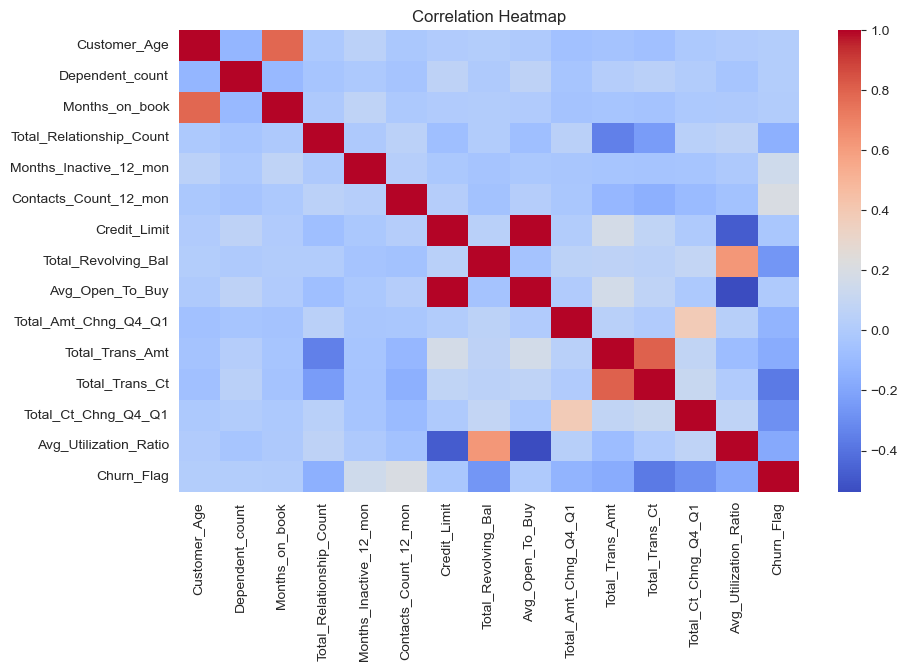

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../Images/correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [21]:
#Separate features (X) and Target (y)
X = df.drop(['Churn_Flag', 'Attrition_Flag'], axis=1) # removes target and duplicate churn label
y = df['Churn_Flag']

print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (10127, 19)
shape of y: (10127,)


In [22]:
#Machine learning models need numbers, so we convert text columns (like Gender, Card_Category) into dummy variables.
X = pd.get_dummies(X, drop_first=True) # One-hot encode categorical columns

# Check new columns
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.34,...,False,False,False,True,False,False,False,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.54,...,True,False,False,False,False,True,False,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.59,...,False,False,False,False,True,False,False,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.41,...,False,True,False,False,False,True,False,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.18,...,False,False,False,True,False,False,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (8101, 32)
Test size: (2026, 32)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression Accuracy: 0.8998025666337611

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026



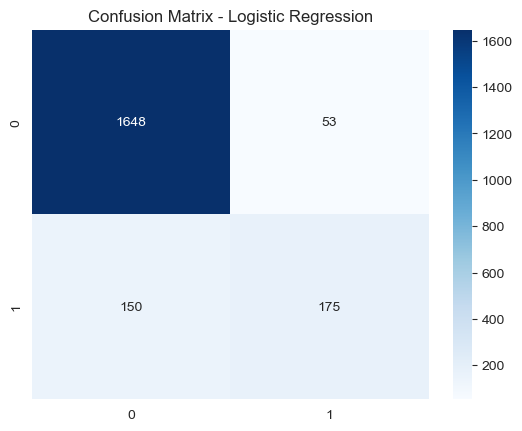

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Accuracy: 0.9545903257650543

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.78      0.85       325

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026



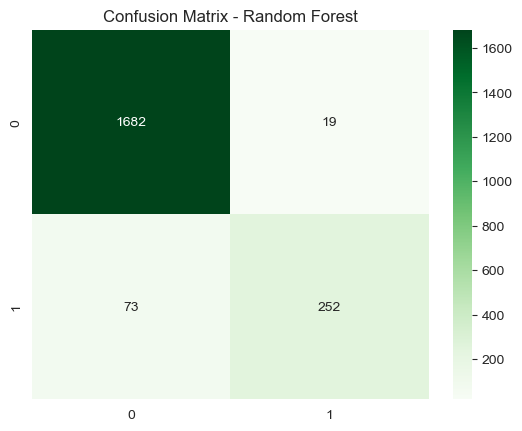

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


Random Forest Accuracy: 0.9545903257650543

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.78      0.85       325

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026



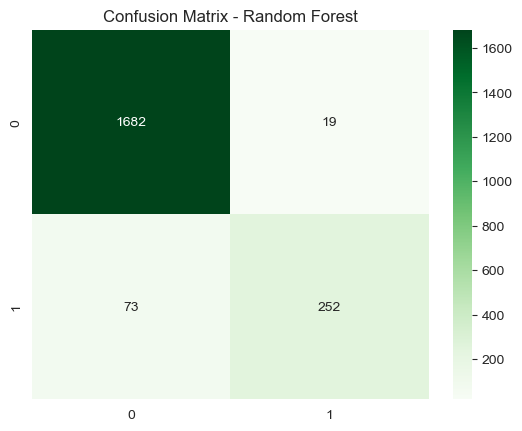

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [29]:
log_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

if rf_acc > log_acc:
    print("✅ Random Forest performed better")
else:
    print("✅ Logistic Regression performed better")


Logistic Regression Accuracy: 0.8998
Random Forest Accuracy: 0.9546
✅ Random Forest performed better


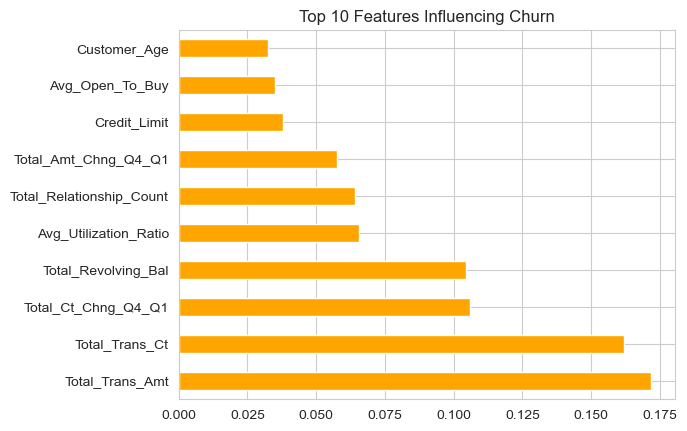

In [30]:
# Get feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=pd.get_dummies(df.drop(['Churn_Flag','Attrition_Flag'], axis=1), drop_first=True).columns)
top_features = feature_importance.nlargest(10)

# Plot
top_features.plot(kind='barh', color='orange')
plt.title("Top 10 Features Influencing Churn")
plt.show()


In [31]:
# Reload original dataframe to keep original column order
df_results = df.copy()

# Get predictions for all rows
df_results['Predicted_Churn_RF'] = rf_model.predict(X)

# Preview
df_results.head()


C:\Users\Siri\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag,Predicted_Churn_RF
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.34,1144,42,1.63,0.06,0,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.54,1291,33,3.71,0.11,0,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.59,1887,20,2.33,0.00,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.41,1171,20,2.33,0.76,0,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.18,816,28,2.50,0.00,0,0


In [32]:
# Save file with predictions
df_results.to_csv('../Dataset/bank_churn_with_predictions.csv', index=False)

print("✅ File saved as 'bank_churn_with_predictions.csv' in Dataset folder")


✅ File saved as 'bank_churn_with_predictions.csv' in Dataset folder
